# ANOVA (분산분석) : 세 맛집 프로그램의 영향력 차이가 있는지 검정

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('raw_data/2017_tidy2.csv')

In [3]:
df.head()

,방송,식당,방영일,포스팅일,제목,주소,days_diff,지역
0,생생,대풍만두,2017-01-03,2017-01-08,안동 사대부찜닭 생생정보통에 나온 <mark>대풍만두</mark> 다녀왔어요,"https://m.blog.naver.com/hts1222/220905835536""",5,안동
1,생생,대풍만두,2017-01-03,2017-01-27,"안동구시장찐빵맛집, 생생정보통 <mark>대풍만두</mark>","https://m.blog.naver.com/pinkwona/220920892215""",24,안동
2,생생,대풍만두,2017-01-03,2016-12-20,"안동시 서부동 만두맛집, <mark>대풍만두</mark>","http://siksamenu.tistory.com/2212""",-14,안동
3,생생,대풍만두,2017-01-03,2017-01-03,오즈패밀리 KBS 생생정보 1월3일 맛집 - 흑미 복분자 찐빵(<mark>대풍만두<...,"https://m.blog.naver.com/flypig1/220901684323""",0,안동
4,생생,대풍만두,2017-01-03,2017-01-03,"◈ 안동 찐빵 만두 맛집 공유~* , 2tv 저녁 생생정보 안동 구시장 찐빵 맛집 ...","https://m.blog.naver.com/mediost/220901827867""",0,안동


In [4]:
df['방영전'] = df['days_diff'] < 0
df['방영후'] = df['days_diff'] >= 0

df['방영전'] = df['방영전'].astype(int)
df['방영후'] = df['방영후'].astype(int)

df.head()

,방송,식당,방영일,포스팅일,제목,주소,days_diff,지역,방영전,방영후
0,생생,대풍만두,2017-01-03,2017-01-08,안동 사대부찜닭 생생정보통에 나온 <mark>대풍만두</mark> 다녀왔어요,"https://m.blog.naver.com/hts1222/220905835536""",5,안동,0,1
1,생생,대풍만두,2017-01-03,2017-01-27,"안동구시장찐빵맛집, 생생정보통 <mark>대풍만두</mark>","https://m.blog.naver.com/pinkwona/220920892215""",24,안동,0,1
2,생생,대풍만두,2017-01-03,2016-12-20,"안동시 서부동 만두맛집, <mark>대풍만두</mark>","http://siksamenu.tistory.com/2212""",-14,안동,1,0
3,생생,대풍만두,2017-01-03,2017-01-03,오즈패밀리 KBS 생생정보 1월3일 맛집 - 흑미 복분자 찐빵(<mark>대풍만두<...,"https://m.blog.naver.com/flypig1/220901684323""",0,안동,0,1
4,생생,대풍만두,2017-01-03,2017-01-03,"◈ 안동 찐빵 만두 맛집 공유~* , 2tv 저녁 생생정보 안동 구시장 찐빵 맛집 ...","https://m.blog.naver.com/mediost/220901827867""",0,안동,0,1


### ANOVA 분석을 위한 데이터 전처리 ( X : 방송명, Y : 방영 후 포스팅 증가수)

In [5]:
anova = pd.DataFrame(df.groupby(['식당', '방송'])['방영전', '방영후'].sum()).reset_index()

In [6]:
anova.head()

,식당,방송,방영전,방영후
0,136생고기,생생,4,45
1,갈비구락부,생생,36,46
2,갓포치유,수요미식회,24,74
3,강릉감자옹심이,수요미식회,177,295
4,강릉아구찜,생생,9,43


In [7]:
anova['증가'] = anova['방영후'] - anova['방영전']

In [8]:
anova.head()

,식당,방송,방영전,방영후,증가
0,136생고기,생생,4,45,41
1,갈비구락부,생생,36,46,10
2,갓포치유,수요미식회,24,74,50
3,강릉감자옹심이,수요미식회,177,295,118
4,강릉아구찜,생생,9,43,34


In [9]:
anova['증가'].groupby(anova['방송']).describe()

,count,mean,std,min,25%,50%,75%,max
방송,,,,,,,,
맛있는녀석들,79.0,18.278481,29.223689,-46.0,7.00,16.0,24.50,202.0
생생,83.0,20.542169,12.731085,-14.0,14.50,21.0,28.00,50.0
수요미식회,84.0,76.119048,41.283155,2.0,48.75,69.0,98.25,265.0


맛있는 녀석들이랑 생생정보통이 평균값이 차이가 별로 없는데, 아무래도 맛있는 녀석들의 -값들이 커서인 것 같음

In [10]:
anova_mat = anova.loc[anova['방송']=='맛있는녀석들']

In [11]:
anova_mat.sort_values(by=['증가']).head(10)

,식당,방송,방영전,방영후,증가
63,두메향기 산,맛있는녀석들,106,60,-46
113,사돈집,맛있는녀석들,103,66,-37
72,류재은베이커리,맛있는녀석들,246,226,-20
24,그릭슈바인,맛있는녀석들,76,60,-16
80,메이탄,맛있는녀석들,504,496,-8
61,동명항게찜,맛있는녀석들,173,167,-6
129,속씨원한 대구탕,맛있는녀석들,97,93,-4
223,팔팔민물장어,맛있는녀석들,31,29,-2
57,도마,맛있는녀석들,16,14,-2
214,크롬방제과,맛있는녀석들,0,1,1


In [12]:
df.loc[df['식당']=='사돈집']

,방송,식당,방영일,포스팅일,제목,주소,days_diff,지역,방영전,방영후
18938,맛있는녀석들,사돈집,2017-09-01,2017-08-10,"속초 맛집 : 이조면옥, 두두 짬뽕순두부, 봉포머구리집, <mark>사돈집</mar...","https://m.blog.naver.com/masurit/221070953821""",-22,속초,1,0
18939,맛있는녀석들,사돈집,2017-09-01,2017-06-26,"속초 물곰탕 맛집 '<mark>사돈집</mark>', 수요미식회 맛집","https://m.blog.naver.com/lovelysuns/221037532916""",-67,속초,1,0
18940,맛있는녀석들,사돈집,2017-09-01,2017-09-18,"속초 먹부림: <mark>사돈집</mark>, 홍게, 닭강정,바다정원","https://m.blog.naver.com/oasiming/221099696688""",17,속초,0,1
18941,맛있는녀석들,사돈집,2017-09-01,2017-07-06,"1706 속초 여행 1일: <mark>사돈집</mark>, 동명항, 라마다 호텔 체크인","http://coolnjazzylife.tistory.com/2111""",-57,속초,1,0
18942,맛있는녀석들,사돈집,2017-09-01,2017-07-14,속초 1일 - 속초에서 제일 사랑하는 음식점 '<mark>사돈집</mark>'+바다...,"https://m.blog.naver.com/oioi0999/221051056721""",-49,속초,1,0
18943,맛있는녀석들,사돈집,2017-09-01,2017-08-26,"[속초맛집] <mark>사돈집</mark> - 속초 별미, 곰치넣고 끓인 물 곰탕과...","https://m.blog.naver.com/mypana777/221082591190""",-6,속초,1,0
18944,맛있는녀석들,사돈집,2017-09-01,2017-09-24,[속초맛집]_88활어/<mark>사돈집</mark>/만석닭강정,"https://m.blog.naver.com/guswjdv/221104211032""",23,속초,0,1
18945,맛있는녀석들,사돈집,2017-09-01,2017-08-17,[<mark>사돈집</mark>/속초] - 아침식사로 가자미조림 좋네요,"https://m.blog.naver.com/melburne/221075301321""",-15,속초,1,0
18946,맛있는녀석들,사돈집,2017-09-01,2017-07-22,2017.05.속초당일-2.영랑동 [<mark>사돈집</mark>]/물곰탕과 가자미조림,"https://m.blog.naver.com/borami97/221057363344""",-41,속초,1,0
18947,맛있는녀석들,사돈집,2017-09-01,2017-11-25,속초 <mark>사돈집</mark> 물곰탕 솔직후기 feat. 맛있는녀석들132회,https://m.blog.naver.com/loveyou_0214/22114834...,85,속초,0,1


이건 제대로 들어간듯

In [13]:
df.loc[df['식당']=='두메향기 산']

,방송,식당,방영일,포스팅일,제목,주소,days_diff,지역,방영전,방영후
18028,맛있는녀석들,두메향기 산,2017-04-28,2017-06-30,양평 <mark>두메</mark><mark>향기</mark>. 여유로운 자연 속 쉼터,"https://m.blog.naver.com/aksuekal/221040797800""",63,양평,0,1
18029,맛있는녀석들,두메향기 산,2017-04-28,2017-04-07,양평 가볼만한곳 <mark>두메</mark><mark>향기</mark>로 봄 맞으로...,"https://m.blog.naver.com/ssolonsun/220977656025""",-21,양평,1,0
18030,맛있는녀석들,두메향기 산,2017-04-28,2017-04-03,양평건강맛집 산채비빔밥 <mark>두메향기 산</mark>,"https://m.blog.naver.com/1429son/220973529279""",-25,양평,1,0
18031,맛있는녀석들,두메향기 산,2017-04-28,2017-07-27,양평 <mark>두메</mark><mark>향기</mark> 밤이면 별빛이 반짝반짝...,"https://m.blog.naver.com/yslee7601/221060932055""",90,양평,0,1
18032,맛있는녀석들,두메향기 산,2017-04-28,2017-03-01,양평가볼만한곳 산나물 <mark>두메</mark><mark>향기</mark> 레스토...,"https://m.blog.naver.com/otk2257/220947573738""",-58,양평,1,0
18033,맛있는녀석들,두메향기 산,2017-04-28,2017-07-16,양평 산나물 <mark>두메</mark><mark>향기</mark> 자연을 담은 한그릇,"https://m.blog.naver.com/tunpark/221051919720""",79,양평,0,1
18034,맛있는녀석들,두메향기 산,2017-04-28,2017-02-11,&lt;양평맛집&gt; 양평 산나물 별미맛집 - 산나물 <mark>두메</mark>...,"https://m.blog.naver.com/lu2u3u/220932683975""",-76,양평,1,0
18035,맛있는녀석들,두메향기 산,2017-04-28,2017-05-05,양평 가볼만한곳 <mark>두메</mark><mark>향기</mark> 봄체험 나물...,"https://m.blog.naver.com/pinkplum80/220998634036""",7,양평,0,1
18036,맛있는녀석들,두메향기 산,2017-04-28,2017-03-07,양평 <mark>두메</mark><mark>향기</mark> 별빛 축제에 다녀왔어요...,"https://m.blog.naver.com/jbcafe/220952400192""",-52,양평,1,0
18037,맛있는녀석들,두메향기 산,2017-04-28,2017-02-03,양평 데이트 <mark>두메</mark><mark>향기</mark> 별빛축제,"https://m.blog.naver.com/ayeon7574/220925937176""",-84,양평,1,0


봤더니 '두메'가 식당 이름이 아니라 양평 지명 이름 + 방영 전 기간에 관련 축제가 있어서 포스팅 수가 많았던 것!
그래서 '두메향기 산' 식당을 삭제하기로 함

In [14]:
df = df[~df['식당'].isin(['두메향기 산'])]

In [15]:
anova = pd.DataFrame(df.groupby(['식당', '방송'])['방영전', '방영후'].sum()).reset_index()
anova['증가'] = anova['방영후'] - anova['방영전']
anova['증가'].groupby(anova['방송']).describe()

,count,mean,std,min,25%,50%,75%,max
방송,,,,,,,,
맛있는녀석들,78.0,19.102564,28.473998,-37.0,7.25,16.0,24.75,202.0
생생,83.0,20.542169,12.731085,-14.0,14.50,21.0,28.00,50.0
수요미식회,84.0,76.119048,41.283155,2.0,48.75,69.0,98.25,265.0


헐.. 더 차이가 안 난다.... 그래도 수요미식회는 다른 프로그램들과는 확연한 차이가 있음

In [16]:
anova.to_csv('2017_anova.csv', index=False)

## 가정 check!

### 1. 정규성 검정

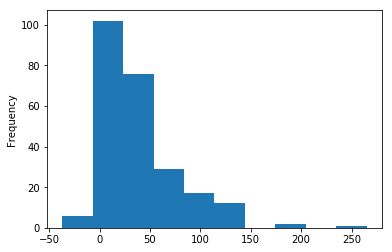

In [17]:
anova['증가'].plot(kind = 'hist')

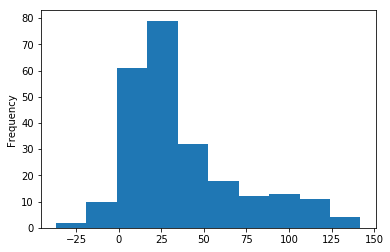

In [18]:
anova1 = anova.loc[anova['증가']<150]
anova1['증가'].plot(kind = 'hist')

outlier 제거해봄

In [19]:
stats.shapiro(anova['증가'][anova['방송'] == '맛있는녀석들'])

(0.629001259803772, 9.766585326934085e-13)

In [20]:
stats.shapiro(anova['증가'][anova['방송'] == '생생'])

(0.9834602475166321, 0.3650396168231964)

In [21]:
stats.shapiro(anova['증가'][anova['방송'] == '수요미식회'])

(0.9097084403038025, 2.101886275340803e-05)

생생정보통 빼고 정규성에 위배됨.......

((array([-2.37195453, -2.02429227, -1.82195584, -1.67475005, -1.55685515,
         -1.45732576, -1.37044486, -1.29283054, -1.22230774, -1.15739046,
         -1.09701584, -1.04039577, -0.98692856, -0.93614359, -0.88766522,
         -0.8411883 , -0.79646114, -0.75327338, -0.71144706, -0.67082998,
         -0.63129074, -0.59271479, -0.55500149, -0.51806168, -0.48181576,
         -0.44619218, -0.41112616, -0.37655864, -0.34243544, -0.30870647,
         -0.27532518, -0.24224798, -0.20943379, -0.17684364, -0.14444028,
         -0.11218792, -0.08005187, -0.04799829, -0.01599397,  0.01599397,
          0.04799829,  0.08005187,  0.11218792,  0.14444028,  0.17684364,
          0.20943379,  0.24224798,  0.27532518,  0.30870647,  0.34243544,
          0.37655864,  0.41112616,  0.44619218,  0.48181576,  0.51806168,
          0.55500149,  0.59271479,  0.63129074,  0.67082998,  0.71144706,
          0.75327338,  0.79646114,  0.8411883 ,  0.88766522,  0.93614359,
          0.98692856,  1.04039577,  1.

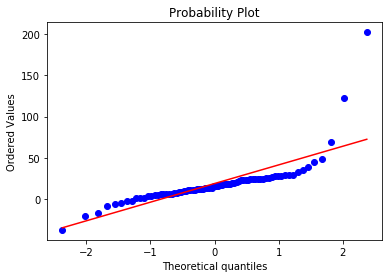

In [22]:
stats.probplot(anova['증가'][anova['방송'] == '맛있는녀석들'], plot= plt)

((array([-2.39472592, -2.04999764, -1.84970871, -1.70418555, -1.58777462,
         -1.48960474, -1.40399923, -1.32760098, -1.25825142, -1.19447624,
         -1.13522129, -1.07970516, -1.02733153, -0.97763423, -0.93024133,
         -0.88485094, -0.84121426, -0.79912351, -0.75840314, -0.7189032 ,
         -0.68049443, -0.64306437, -0.60651441, -0.57075741, -0.5357158 ,
         -0.5013201 , -0.46750761, -0.43422146, -0.40140969, -0.36902459,
         -0.33702204, -0.30536107, -0.27400335, -0.24291282, -0.2120554 ,
         -0.18139862, -0.15091143, -0.1205639 , -0.09032702, -0.06017252,
         -0.03007265,  0.        ,  0.03007265,  0.06017252,  0.09032702,
          0.1205639 ,  0.15091143,  0.18139862,  0.2120554 ,  0.24291282,
          0.27400335,  0.30536107,  0.33702204,  0.36902459,  0.40140969,
          0.43422146,  0.46750761,  0.5013201 ,  0.5357158 ,  0.57075741,
          0.60651441,  0.64306437,  0.68049443,  0.7189032 ,  0.75840314,
          0.79912351,  0.84121426,  0.

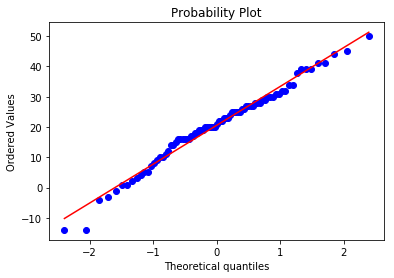

In [23]:
stats.probplot(anova['증가'][anova['방송'] == '생생'], plot= plt)

((array([-2.39909612, -2.05492542, -1.85502454, -1.70981961, -1.59368882,
         -1.49577514, -1.41040959, -1.33423977, -1.26511027, -1.20154899,
         -1.14250341, -1.08719341, -1.03502367, -0.98552885, -0.93833772,
         -0.89314898, -0.84971437, -0.80782658, -0.76731049, -0.72801656,
         -0.68981591, -0.65259645, -0.61625992, -0.58071952, -0.54589805,
         -0.51172637, -0.47814214, -0.44508884, -0.41251489, -0.38037296,
         -0.34861935, -0.3172135 , -0.28611751, -0.25529581, -0.2247148 ,
         -0.19434256, -0.16414858, -0.13410355, -0.10417912, -0.07434771,
         -0.04458233, -0.0148564 ,  0.0148564 ,  0.04458233,  0.07434771,
          0.10417912,  0.13410355,  0.16414858,  0.19434256,  0.2247148 ,
          0.25529581,  0.28611751,  0.3172135 ,  0.34861935,  0.38037296,
          0.41251489,  0.44508884,  0.47814214,  0.51172637,  0.54589805,
          0.58071952,  0.61625992,  0.65259645,  0.68981591,  0.72801656,
          0.76731049,  0.80782658,  0.

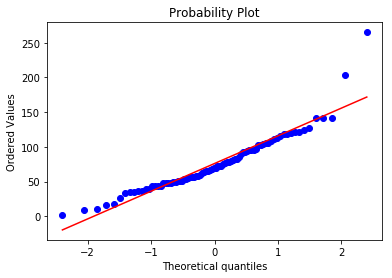

In [24]:
stats.probplot(anova['증가'][anova['방송'] == '수요미식회'], plot= plt)

흠....
일단 데이터의 수가 크니 정규분포를 따른다고 가정하고 넘어가자

### 2. 등분산 검정

In [25]:
stats.levene(anova['증가'][anova['방송'] == '맛있는녀석들'], 
             anova['증가'][anova['방송'] == '생생'],
             anova['증가'][anova['방송'] == '수요미식회'])

LeveneResult(statistic=19.57405996362479, pvalue=1.3197815692481675e-08)

등분산도..

## ANOVA

In [26]:
stats.f_oneway(anova['증가'][anova['방송'] == '맛있는녀석들'], 
             anova['증가'][anova['방송'] == '생생'],
             anova['증가'][anova['방송'] == '수요미식회'])

F_onewayResult(statistic=97.44039805224205, pvalue=9.072808375244401e-32)

**p-value < 0.05 이므로 귀무가설(세 프로그램의 방영전후 포스팅 차이의 평균이 같다)이 기각됨.

**즉, 적어도 하나의 프로그램의 방영전후 포스팅 차이의 평균이 다르다고 결론낼 수 있음.

**평균 차이가 있는 프로그램을 알아보려면 사후검정을 해야됨**

## 사후검정 : Tukey's HSD Post-hoc comparison

In [27]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [28]:
mc = MultiComparison(anova['증가'], anova['방송'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
맛있는녀석들   생생    1.4396  -9.7017 12.5809 False 
맛있는녀석들 수요미식회  57.0165  45.9073 68.1256  True 
  생생   수요미식회  55.5769  44.6426 66.5112  True 
---------------------------------------------


**맛있는 녀석들과 생생정보통의 방영후 포스팅 증가 개수의 평균은 다르다고 할 수 없지만, 

**(맛있는 녀석들, 수요미식회), (생생정보통, 수요미식회)는 평균 차이가 있다고 할 수 있음**